In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.initializers import Constant
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Using TensorFlow backend.


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
df = pd.read_json('News_Category_Dataset_v2.json', lines = True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [4]:
cat = df.groupby('category')
print("Total categories", cat.ngroups)
print(cat.size())

Total categories 41
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST  

In [5]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [6]:
df['text'] = df.headline + " " + df.short_description

token = Tokenizer()
token.fit_on_texts(df.text)
X = token.texts_to_sequences(df.text)
df['words'] = X

df['word_len'] = df.words.apply(lambda i: len(i))
df = df[df.word_len >= 5]

df.head()

,category,headline,authors,link,short_description,date,text,words,word_len
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,"[74, 101, 257, 1331, 3001, 6, 698, 134, 96, 26...",27
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,"[42, 1604, 2960, 27762, 5, 25929, 5237, 8, 1, ...",20
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,"[5877, 5334, 8083, 8, 1, 76, 54, 21, 414, 8469...",25
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[2710, 13374, 3596, 64143, 2295, 13055, 5, 569...",26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,"[41003, 36082, 1513, 97, 48, 7915, 3134, 2, 96...",26


In [7]:
maxlen = 50
X = list(sequence.pad_sequences(df.words, maxlen = maxlen))

In [8]:
categories = df.groupby('category').size().index.tolist()
cat_int = {}
int_cat = {}
for i, k in enumerate(categories):
    cat_int.update({k : i})
    int_cat.update({i : K})
df['c2id'] = df['category'].apply(lambda x: cat_int[x])

/home/soulreaper/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
word_index = token.word_index

EmbD = 100

embedding_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embedding_index[word] = coefs
f.close()

print('Unique tokens', len(word_index))
print('Total word vectors', len(embedding_index))

Unique tokens 116617
Total word vectors 400000


In [10]:
embedding_matrix = np.zeros((len(word_index) + 1, EmbD))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [11]:
X = np.array(X)
Y = np_utils.to_categorical(list(df.c2id))

seed = 30
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = seed)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1,
                            EmbD,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)),
    tf.keras.layers.Conv1D(64, kernel_size = 3),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(len(int_cat), activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           11661800  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 256)           176640    
_________________________________________________________________
conv1d (Conv1D)              (None, 48, 64)            49216     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 40)                2600      
Total params: 11,890,256
Trainable params: 228,456
Non-trainable params: 11,661,800
______________________________________

In [13]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 148s 118ms/step - loss: 1.8668 - accuracy: 0.4974 - val_loss: 1.4969 - val_accuracy: 0.5787
Epoch 2/10
1250/1250 [==============================] - 147s 118ms/step - loss: 1.5135 - accuracy: 0.5722 - val_loss: 1.3945 - val_accuracy: 0.6019
Epoch 3/10
1250/1250 [==============================] - 148s 118ms/step - loss: 1.4187 - accuracy: 0.5944 - val_loss: 1.3393 - val_accuracy: 0.6155
Epoch 4/10
1250/1250 [==============================] - 147s 117ms/step - loss: 1.3654 - accuracy: 0.6075 - val_loss: 1.3106 - val_accuracy: 0.6240
Epoch 5/10
1250/1250 [==============================] - 146s 117ms/step - loss: 1.3241 - accuracy: 0.6165 - val_loss: 1.2901 - val_accuracy: 0.6278
Epoch 6/10
1250/1250 [==============================] - 144s 115ms/step - loss: 1.2913 - accuracy: 0.6241 - val_loss: 1.2750 - val_accuracy: 0.6293
Epoch 7/10
1250/1250 [==============================] - 144s 115ms/step - loss: 1.2702 - accuracy: 0.6299 - val_

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Train and Val Accuracy')

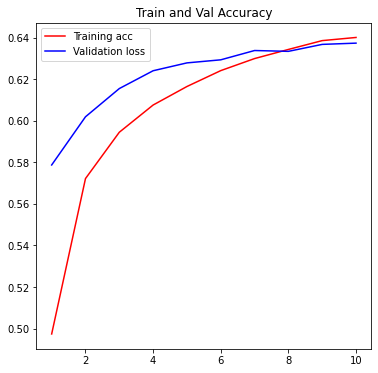

In [15]:
plt.figure(figsize = (6,6))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title("Train and Val Accuracy")
plt.plot(epochs, acc, 'red', label = 'Training acc')
plt.plot(epochs, val_acc, 'blue', label = 'Validation loss')
plt.legend()

plt.show()

In [16]:
#Have to make Predictions
Test_string = 'IPS officer suspended after being caught on camera for beating wife daughter backs him'
token_list = token.texts_to_sequences([Test_string])
pred = model.predict(token_list)
print(np.argmax(pred))
a = np.argmax(pred)

22


In [17]:
print(y_train[39])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
df.head()

,category,headline,authors,link,short_description,date,text,words,word_len,c2id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,"[74, 101, 257, 1331, 3001, 6, 698, 134, 96, 26...",27,6
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,"[42, 1604, 2960, 27762, 5, 25929, 5237, 8, 1, ...",20,10
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,"[5877, 5334, 8083, 8, 1, 76, 54, 21, 414, 8469...",25,10
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[2710, 13374, 3596, 64143, 2295, 13055, 5, 569...",26,10
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,"[41003, 36082, 1513, 97, 48, 7915, 3134, 2, 96...",26,10


In [19]:
b = df[df.c2id == a]['category']
b = b.iloc[0]
print(b)

PARENTING
